<a href="https://colab.research.google.com/github/EshanthPatyal/Intro-to-Data-Science-Project/blob/main/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
df_x = car_evaluation.data.features
df_y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

# **Exploratory Data Analysis**

In [4]:

# variable information
print(car_evaluation.variables)

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

In [5]:
df_x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [6]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [7]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


In [8]:
df_x.describe().T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576


# **One Hot Encoding the Dataset**

In [9]:
from sklearn.preprocessing import OneHotEncoder


In [10]:
import pandas as pd

# Concatenate df_x and df_y to perform one-hot encoding on the entire dataset
df = pd.concat([df_x, df_y], axis=1)

# Perform one-hot encoding using pd.get_dummies
df_encoded = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
df_class=pd.get_dummies(df_y)

df_x_encoded = df_encoded.drop(['class'], axis=1)
df_y_encoded = df_class



In [11]:
df_x_encoded[0:5]

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [12]:
df_y_encoded[0:5]

,class_acc,class_good,class_unacc,class_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [14]:
df_x[0:5]

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [15]:
df_y[0:5]

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [16]:
df_x_encoded.describe()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,...,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,...,0.433138,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df_y_encoded.describe()

,class_acc,class_good,class_unacc,class_vgood
count,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.222222,0.039931,0.700231,0.037616
std,0.415860,0.195853,0.458289,0.190320
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


<Axes: >

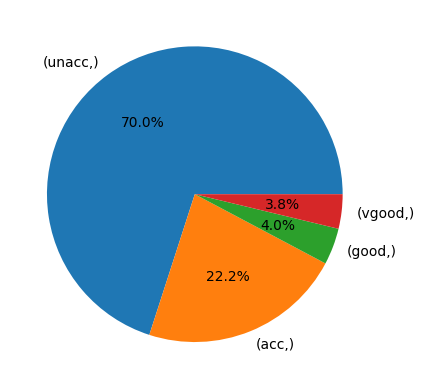

In [19]:
df_y.value_counts().plot.pie(autopct='%1.1f%%')

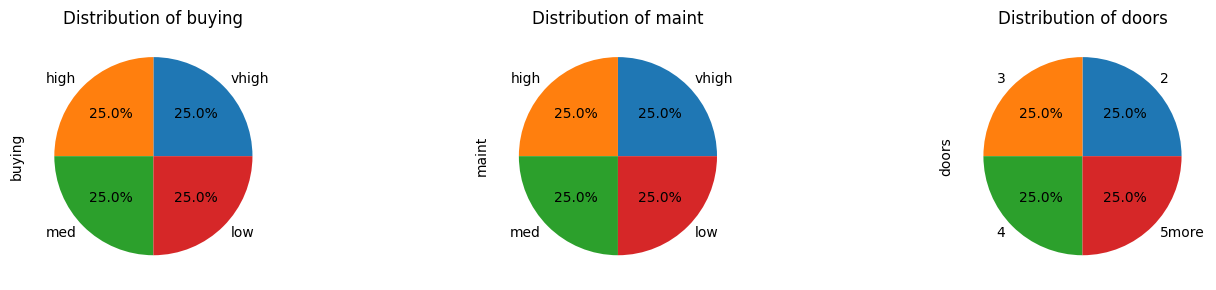

In [20]:
data = ['buying', 'maint', 'doors']

# Set up subplots in a single row
fig, axes = plt.subplots(1, len(data), figsize=(15, 3))

for i, column in enumerate(data):
    df_x[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


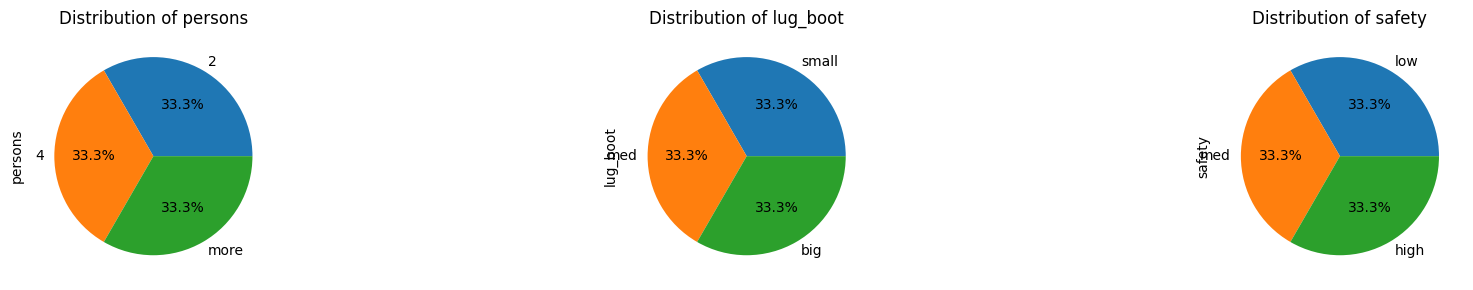

In [28]:
data = ['persons', 'lug_boot', 'safety']

# Set up subplots in a single row
fig, axes = plt.subplots(1, len(data), figsize=(20, 3))

for i, column in enumerate(data):
    df_x[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Graphical Analysis shows equal distribution of records for each attribute in the dataset


# **Model Fitting**

**KNN**

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [33]:
y = df_y
X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn:.2f}")
print("KNN Classification Report:\n", classification_report_knn)


KNN Accuracy: 0.88
KNN Classification Report:
               precision    recall  f1-score   support

         acc       0.78      0.75      0.77        83
        good       0.30      0.27      0.29        11
       unacc       0.92      0.99      0.96       235
       vgood       1.00      0.29      0.45        17

    accuracy                           0.88       346
   macro avg       0.75      0.58      0.62       346
weighted avg       0.87      0.88      0.86       346



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Init of Decision Tree
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Decision Tree Classification Report:\n", classification_report_dt)


Decision Tree Accuracy: 0.96
Decision Tree Classification Report:
               precision    recall  f1-score   support

         acc       0.99      0.89      0.94        83
        good       0.62      0.91      0.74        11
       unacc       0.99      1.00      0.99       235
       vgood       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.86      0.91      0.87       346
weighted avg       0.97      0.96      0.96       346



**Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Init of Random Forest
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:\n", classification_report_rf)


<ipython-input-37-d9c113790a16>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Random Forest Accuracy: 0.95
Random Forest Classification Report:
               precision    recall  f1-score   support

         acc       0.95      0.88      0.91        83
        good       0.53      0.82      0.64        11
       unacc       0.99      1.00      1.00       235
       vgood       0.87      0.76      0.81        17

    accuracy                           0.95       346
   macro avg       0.83      0.87      0.84       346
weighted avg       0.96      0.95      0.96       346



**SVM**

In [38]:
from sklearn.svm import SVC


svc_classifier = SVC()

svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)

print(f"SVC Accuracy: {accuracy_svc:.2f}")
print("SVC Classification Report:\n", classification_report_svc)


SVC Accuracy: 0.97
SVC Classification Report:
               precision    recall  f1-score   support

         acc       0.99      0.89      0.94        83
        good       0.59      0.91      0.71        11
       unacc       1.00      1.00      1.00       235
       vgood       0.84      0.94      0.89        17

    accuracy                           0.97       346
   macro avg       0.85      0.94      0.88       346
weighted avg       0.98      0.97      0.97       346



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Naive Bayes**

In [39]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("Naive Bayes Classification Report:\n", classification_report_nb)

Naive Bayes Accuracy: 0.82
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         acc       0.63      0.54      0.58        83
        good       0.57      0.36      0.44        11
       unacc       0.87      0.97      0.91       235
       vgood       1.00      0.35      0.52        17

    accuracy                           0.82       346
   macro avg       0.77      0.56      0.62       346
weighted avg       0.81      0.82      0.80       346



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print("Logistic Regression Classification Report:\n", classification_report_logreg)


Logistic Regression Accuracy: 0.92
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         acc       0.84      0.82      0.83        83
        good       0.50      0.55      0.52        11
       unacc       0.96      0.97      0.97       235
       vgood       0.94      0.88      0.91        17

    accuracy                           0.92       346
   macro avg       0.81      0.80      0.81       346
weighted avg       0.92      0.92      0.92       346



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
